In [ ]:
!git clone https://github.com/Ikromov247/capstone2023.git

fatal: destination path 'capstone2023' already exists and is not an empty directory.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
file_path1 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(101지점).xls.xlsx'
file_path2 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(102지점).xls.xlsx'
file_path3 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(103지점).xls.xlsx'
file_path4 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(104지점).xls.xlsx'
file_path5 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(105지점).xls.xlsx'
file_path6 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(106지점).xls.xlsx'
file_path7 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(107지점).xls.xlsx'
file_path8 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(108지점).xls.xlsx'
file_path9 = '/content/capstone2023/dataset/2022-12-01-2023-07-01(109지점).xls.xlsx'

In [ ]:
df1 = pd.read_excel(file_path1)
df2 = pd.read_excel(file_path2)
df3 = pd.read_excel(file_path3)
df4 = pd.read_excel(file_path4)
df5 = pd.read_excel(file_path5)
df6 = pd.read_excel(file_path6)
df7 = pd.read_excel(file_path7)
df8 = pd.read_excel(file_path8)
df9 = pd.read_excel(file_path9)


In [77]:
df9.head()


,시간,ou,NH3,H2S,TVOCs,pozip,temperature,humidity,winddirection,windspeed,atm
0,2022-12-12 16:33:00,1.8,0.836,0.369,0.100,0,6.9,6.3,남,1.0,0
1,2022-12-12 16:39:00,1.6,0.828,0.353,0.098,0,6.9,6.3,남남동,2.2,0
2,2022-12-12 16:44:00,1.4,0.821,0.338,0.098,0,6.9,6.3,남,1.0,0
3,2022-12-12 16:49:00,1.3,0.815,0.326,0.097,0,6.9,6.3,남남동,1.4,0
4,2022-12-12 16:54:00,1.2,0.809,0.323,0.096,0,6.9,6.4,남,1.1,0


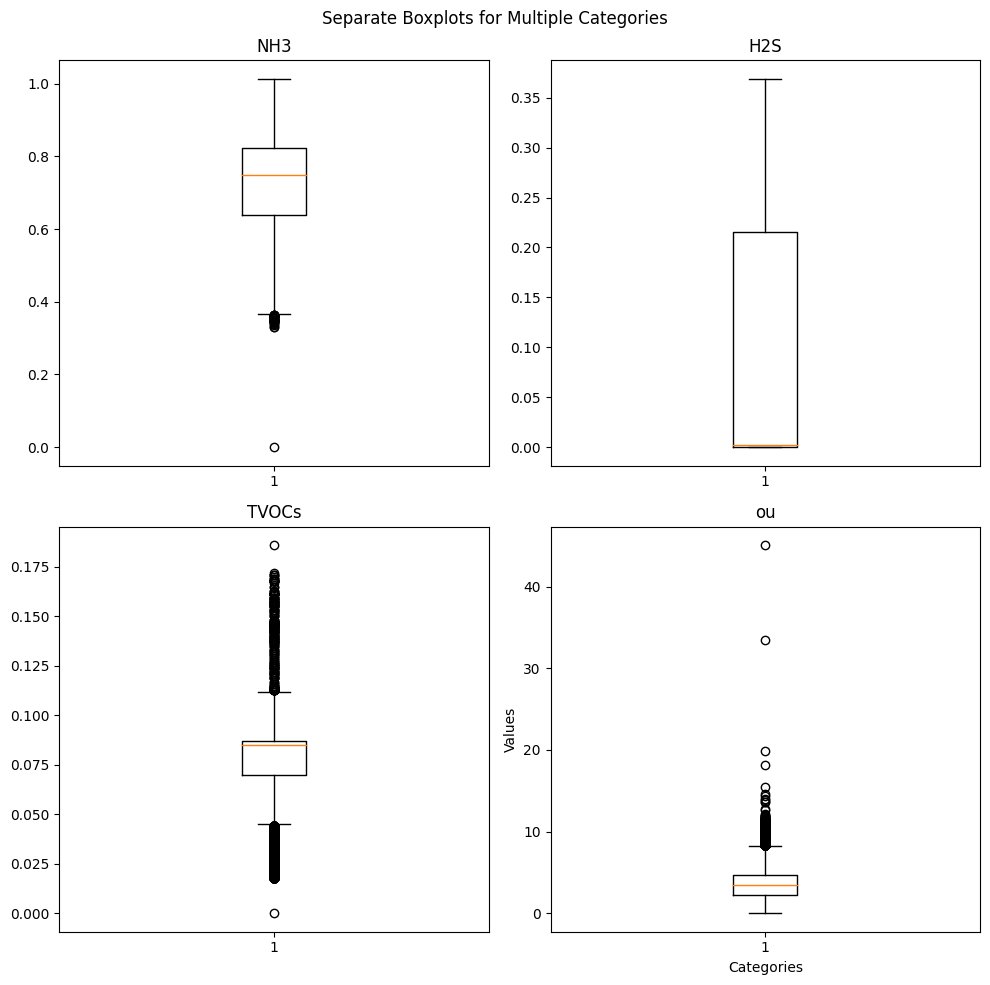

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the first boxplot
axs = axs.ravel()

axs[0].boxplot(df9['NH3'])
axs[0].set_title('NH3')

# Plot the second boxplot
axs[1].boxplot(df9['H2S'])
axs[1].set_title('H2S')

# Plot the third boxplot
axs[2].boxplot(df9['TVOCs'])
axs[2].set_title('TVOCs')

axs[3].boxplot(df9['ou'])
axs[3].set_title('ou')

# Add labels and a title to the entire figure
plt.xlabel("Categories")
plt.ylabel("Values")
plt.suptitle("Separate Boxplots for Multiple Categories")

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()



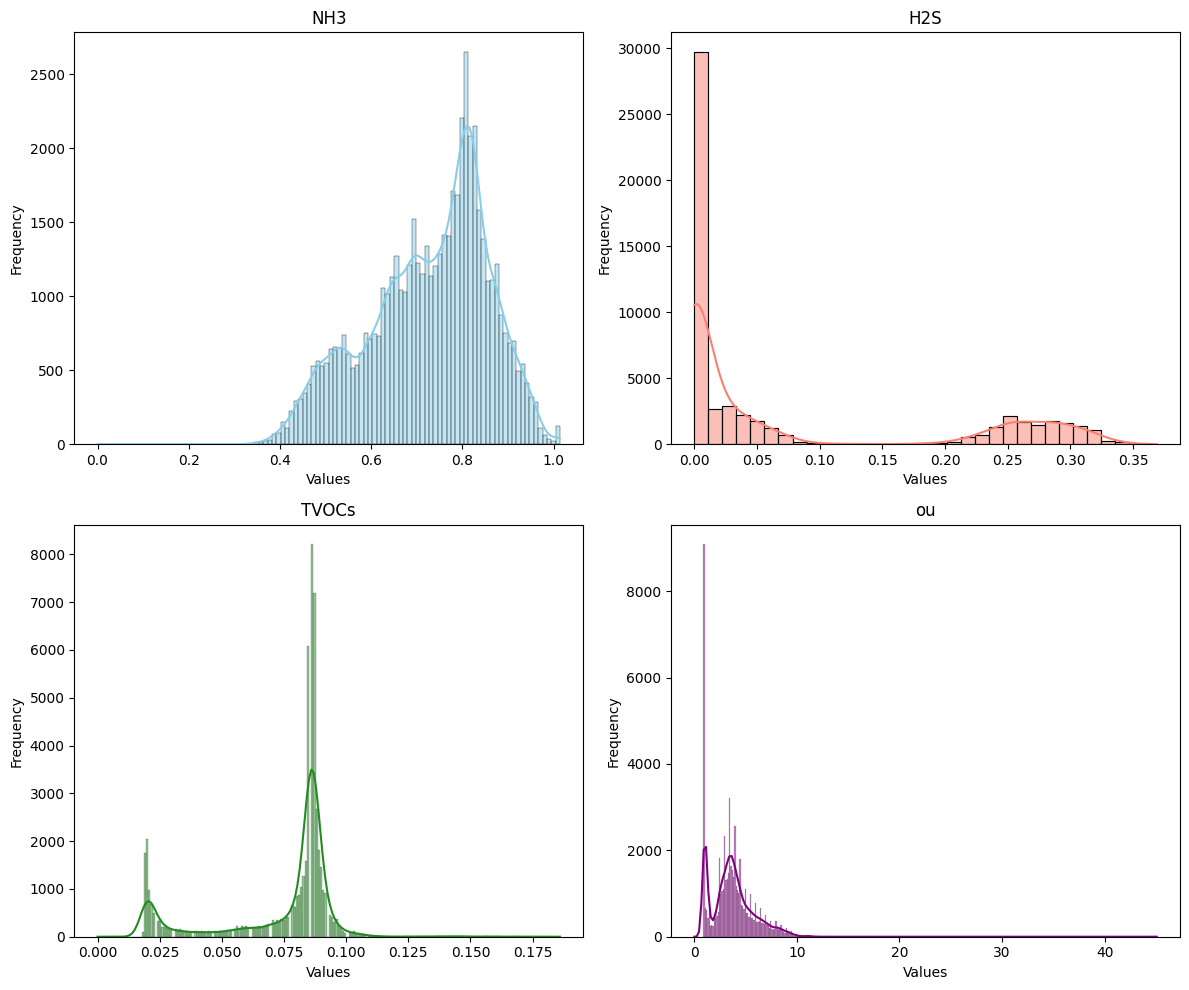

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first histogram (top-left)
sns.histplot(df9['NH3'], kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_xlabel("Values")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("NH3")

# Plot the second histogram (top-right)
sns.histplot(df9['H2S'], kde=True, color='salmon', ax=axs[0, 1])
axs[0, 1].set_xlabel("Values")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("H2S")

# Plot the third histogram (bottom-left)
sns.histplot(df9['TVOCs'], kde=True, color='forestgreen', ax=axs[1, 0])
axs[1, 0].set_xlabel("Values")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].set_title("TVOCs")

# Plot the fourth histogram (bottom-right)
sns.histplot(df9['ou'], kde=True, color='purple', ax=axs[1, 1])
axs[1, 1].set_xlabel("Values")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title("ou")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [81]:
#Threshold

df9.drop(df9[df9["ou"]>15].index, inplace=True)
df9.drop(df9[df9["TVOCs"]>0.11].index, inplace=True)
df9.drop(df9[df9["NH3"]<0.3].index, inplace=True)

In [84]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your data
regressor.fit(df9[['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'atm', 'pozip']], df9['ou'])


# Get feature importances from the trained regressor
feature_importances = regressor.feature_importances_


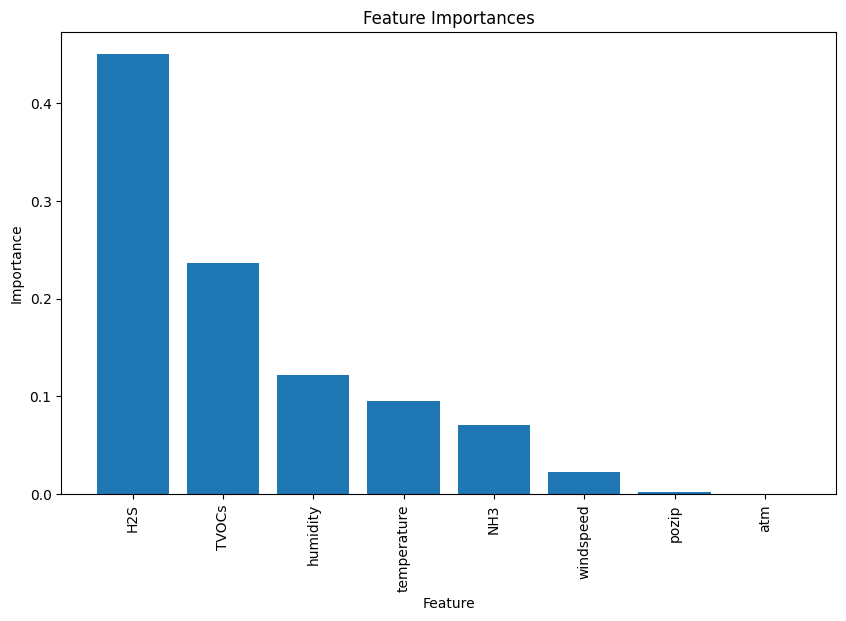

In [85]:
# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features (assuming they are in a list or DataFrame)
feature_names = df9[['NH3', 'H2S', 'TVOCs', 'temperature', 'humidity', 'windspeed', 'atm', 'pozip']].columns  # Change this to your actual feature names

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
